<h1 style="border: 1.5px solid #ccc; 
           padding: 8px 12px; 
           color:#56BFCB;"
    >
    <center> <br/>
        Lista de Exercícios 4a <br/>
        <span style="font-size:18px;"> Guilherme Esdras </span>
    </center>
</h1>

---

<b>
    <center>
        Imports
    </center>
</b>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')

import sympy as sp
sp.init_printing()
sp.var('x, y')

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 1:</b> Implemente o método da Bisseção descrito pelo algoritmo 1.1 no texto. Para testar o algoritmo, use os exemplos do material textual.
</div>

In [2]:
# Implementando função do Método da Bisseção

# Versão 1 (antes da aula de quinta-feira)

def bissecao_old(f, a, b, n_its, tol, verbose=False, r_tb=False):
    '''
    Método da Bisseção v1
        [by guilherme esdras]
    
    Parâmetros:
    ----------
        f (function) : 
            A função na qual busca-se encontrar uma solução aproximada para f(x) = 0.
        a (int), b (int): 
            Limites inferior e superior, respectivamente, do intervalo.
        n_its (int): 
            Número máximo de iterações.
        tol (float): 
            Tolerância mínima ou Erro aceitável (critério de parada).
        verbose (boolean):
            True = exibe as tabelas e prints;
            False (padrão) = não exibe.
        r_tb (boolean):
            True = retorna uma tabela de dados para uso com Pandas;
            False (padrão) = não retorna.
            
        
    Retornos:
    -------
        xi (int): 
            O ponto médio do intervalo computado na i-ésima iteração.
        i (int): 
            O número máximo de iterações que foi preciso para encontrar a solução.
    
    '''
    
    # Inicializa as variaveis de entrada
    i = 0
    ai = a
    bi = b
    
    ''' Opcional... '''
    if verbose or r_tb: tb = []
    
    # Verifica a existencia da raiz,
    # primeiro testando:
    if np.sign(f(a)) * np.sign(f(b)) != -1:
        if verbose: print('Não existe raiz no intervalo. Encerrando!')
        return
    
    # Caso não contrário...
    else:
        # Enquanto a tolerância for aceitável e o número de iterações não tiver sido atingido...
        while ( ((bi - ai) / 2.0) > tol ) and ( i < n_its ):
            
            ''' Opcional... ''' 
            if verbose or r_tb: tb.append([]); tb[i].append(ai); tb[i].append(bi);
            
            # calcula o ponto médio do intervalo...
            xi = (ai + bi) / 2.0
            
            ''' Opcional... '''
            if verbose or r_tb: tb[i].append(xi); tb[i].append(f(xi));
            
            # verifica se este ponto médio é a raiz...
            if f(xi) == 0:
                ''' Opcional... ''' 
                if verbose: print('A raiz é o valor atual de x!')
                    
                return ( xi, i )
            
            # caso contrário, verificar em que subintervalo está a raiz...
            else:
                
                # se o primeiro subintervalo tem a raiz...
                if np.sign(f(ai)) * np.sign(f(xi)) == -1:
                    # atualiza o limite superior:
                    bi = xi
                
                # caso contrário (se o segundo subintervalo tem a raiz)...
                else:
                    # atualiza o limite inferior:
                    ai = xi
                
                # atualiza o iterador, incrementado-o
                i += 1
        
        ''' Opcional... '''
        if verbose:
            msg = f'Raiz encontrada: {xi} | Em {i} iterações'
            print(pd.DataFrame(tb, columns=["a", "b", "x", "f(x)"]))
            print('-'*len(msg))
            print(msg)
            print('-'*len(msg))
        ''' ----------- '''
        
        # ao fim, retorna o valor exato ou aproximado da raiz
        if not r_tb: return ( xi, i )
        else: return ( xi, i, tb )

In [3]:
def bissecao_do_professor(f, a, b, tol=1e-10):
    i  = 0;
    erro, x_ant = 1, a
    while(erro > tol):
        inf = np.sign(f(a))
        sup = np.sign(f(b))
        if inf*sup != -1:
            print("Não há raiz nesse intervalo")
            return
        else:
            x = (a + b)/2.
            if f(x) == 0:
                print("A raíz é", x)
                return
            elif inf*np.sign(f(x)) == -1:
                b = x
            else: a = x
        erro = np.abs((x - x_ant)/np.abs(x))
        x_ant = x
    return x

In [4]:
# Implementando função do Método da Bisseção

def bissecao(f, a, b, n_its=9999, tol=1e-10, verbose=False, r_tb=False, p_err=False):
    '''
    Método da Bisseção
        [by guilherme esdras]
    
    Parâmetros:
    ----------
        f (function): 
            A função na qual busca-se encontrar uma solução aproximada para f(x) = 0.
        a (int), b (int): 
            Limites inferior e superior, respectivamente, do intervalo.
        n_its (int) [Opcional | Default: 9999]: 
            Número máximo de iterações.
        tol (float) [Opcional | Default: 1e-10]: 
            Tolerância mínima ou Erro aceitável (critério de parada). Se nenhum valor for passado o padrão será 10^-10.
        verbose (boolean):
            True:
                Exibe as tabelas e prints;
            False (default):
                Não exibe.
        r_tb (boolean):
            True:
                Retorna uma tabela de dados para uso com Pandas;
            False (default):
                Não retorna.
        p_err (boolean):
            True:
                Imprime o erro em cada iteração;
            False (default):
                Não imprime.
            
        
    Retornos:
    -------
        xi (int): 
            O ponto médio do intervalo computado na i-ésima iteração.
        i (int): 
            O número máximo de iterações que foi preciso para encontrar a solução.
    
    '''
    
    # Inicializa as variaveis de entrada
    i = 0
    ai = a
    bi = b
    
    ''' Opcional... '''
    if verbose or r_tb: tb = []
    
    # Verifica a existencia da raiz,
    # primeiro testando:
    if np.sign(f(a)) * np.sign(f(b)) != -1:
        ''' Opcional... '''
        if verbose: print('Não existe raiz no intervalo. Encerrando!')
        return
    
    # Caso não contrário...
    else:
        erro, x_ant = 1, a
        # Enquanto a tolerância for aceitável e o número de iterações não tiver sido atingido...
        while ( erro > tol ) and ( i < n_its ):
            ''' Opcional... ''' 
            if verbose or r_tb: tb.append([]); tb[i].append(ai); tb[i].append(bi);
                
            # calcula o ponto médio do intervalo...
            x = ai + 0.5 * (bi - ai) # (ai + bi) / 2.0
            
            ''' Opcional... '''
            if verbose or r_tb: tb[i].append(x); tb[i].append(f(x));
            
            # verifica se este ponto médio é a raiz...
            if f(x) == 0:
                ''' Opcional... ''' 
                if verbose: print('A raiz é o valor atual de x!')
                return ( x, i )
            # caso contrário, verificar em que subintervalo está a raiz...
            else:
                # se o primeiro subintervalo tem a raiz...
                if np.sign(f(ai)) * np.sign(f(x)) == -1:
                    # atualiza o limite superior:
                    bi = x
                # caso contrário (se o segundo subintervalo tem a raiz)...
                else:
                    # atualiza o limite inferior:
                    ai = x
                # atualiza o iterador, incrementado-o
                i += 1
            
            # calcula o erro
            erro = np.abs((x - x_ant) / np.abs(x))
            x_ant = x
            if p_err: print(f'Erro {i}: {erro:.5f}')
        
        ''' Opcional... '''
        if verbose:
            msg = f'Raiz encontrada: {x} | Em {i} iterações'
            print('-'*len(msg))
            print(pd.DataFrame(tb, columns=["a", "b", "x", "f(x)"]))
            print('-'*len(msg))
            print(msg)
            print('-'*len(msg))
        ''' ----------- '''
        
        # ao fim, retorna o valor exato ou aproximado da raiz
        if not r_tb: return ( x, i )
        else: return ( x, i, tb )

---

**Realizando Teste 01**

In [5]:
f = lambda x: ( x**5+2*x**3-5*x-2 )
sp.var('x')
f_sp = sp.Lambda(x, x**5+2*x**3-5*x-2)
f_sp

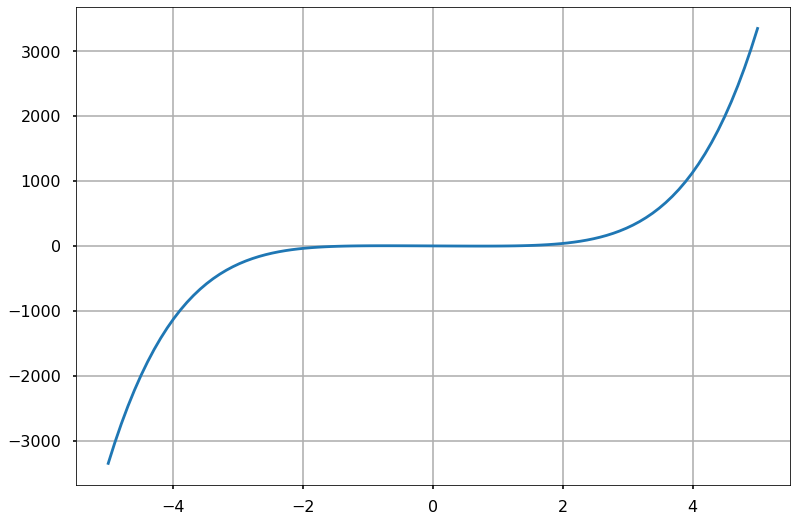

In [6]:
x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.grid()

In [7]:
bissecao(f, -2, 2, verbose=True)

----------------------------------------------------
           a         b         x          f(x)
0  -2.000000  2.000000  0.000000 -2.000000e+00
1   0.000000  2.000000  1.000000 -4.000000e+00
2   1.000000  2.000000  1.500000  4.843750e+00
3   1.000000  1.500000  1.250000 -1.291992e+00
4   1.250000  1.500000  1.375000  1.239105e+00
5   1.250000  1.375000  1.312500 -1.456251e-01
6   1.312500  1.375000  1.343750  5.151652e-01
7   1.312500  1.343750  1.328125  1.771047e-01
8   1.312500  1.328125  1.320312  1.385145e-02
9   1.312500  1.320312  1.316406 -6.635544e-02
10  1.316406  1.320312  1.318359 -2.636958e-02
11  1.318359  1.320312  1.319336 -6.288519e-03
12  1.319336  1.320312  1.319824  3.774095e-03
13  1.319336  1.319824  1.319580 -1.259053e-03
14  1.319580  1.319824  1.319702  1.257060e-03
15  1.319580  1.319702  1.319641 -1.111565e-06
16  1.319641  1.319702  1.319672  6.279456e-04
17  1.319641  1.319672  1.319656  3.134098e-04
18  1.319641  1.319656  1.319649  1.561473e-04
19  1.3

In [8]:
bissecao_do_professor(f, -2, 2)

---

**Realizando Teste 02**

In [9]:
f = lambda x: ( x * np.exp(x) - np.sin(8 * x) - 1)

sp.var('x')
f_sp = sp.Lambda(x, x * sp.exp(x) - sp.sin(8 * x) - 1)
f_sp

In [10]:
x, i, tb = bissecao(f, -0.5, 1, r_tb=True)

print('\nRaiz {} encontrada em {} iterações.\nComo mostrado na tabela:\n'.format(x, i))

pd.DataFrame(tb, columns=["a", "b", "x", "f(x)"])


Raiz 0.43458593652030686 encontrada em 36 iterações.
Como mostrado na tabela:



,a,b,x,f(x)
0,-0.500000,1.000000,0.250000,-1.588291e+00
1,0.250000,1.000000,0.625000,1.126578e+00
2,0.250000,0.625000,0.437500,2.839648e-02
3,0.250000,0.437500,0.343750,-8.968958e-01
4,0.343750,0.437500,0.390625,-4.392856e-01
5,0.390625,0.437500,0.414062,-2.034669e-01
6,0.414062,0.437500,0.425781,-8.664151e-02
7,0.425781,0.437500,0.431641,-2.885010e-02
8,0.431641,0.437500,0.434570,-1.526564e-04
9,0.434570,0.437500,0.436035,1.414120e-02


---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 2</b> - Determine as raízes reais de $f(x) = −0.5x^2 + 2.5x + 4.5$
</div>

In [11]:
# Exibindo
f = lambda x: ( ((-0.5)*(x**2)) + (2.5*x) + (4.5) )
sp.var('x')
f_sp = sp.Lambda(x, ((-0.5)*(x**2)) + (2.5*x) + (4.5))
f_sp

In [12]:
a = (-0.5)
b = 2.5
c = 4.5

coefs = np.array([a, b, c])
coefs

array([-0.5,  2.5,  4.5])

<ul class="alert alert-block alert-info" style="color:#20484d;">
    <b>(a)</b> Graficamente
</ul>

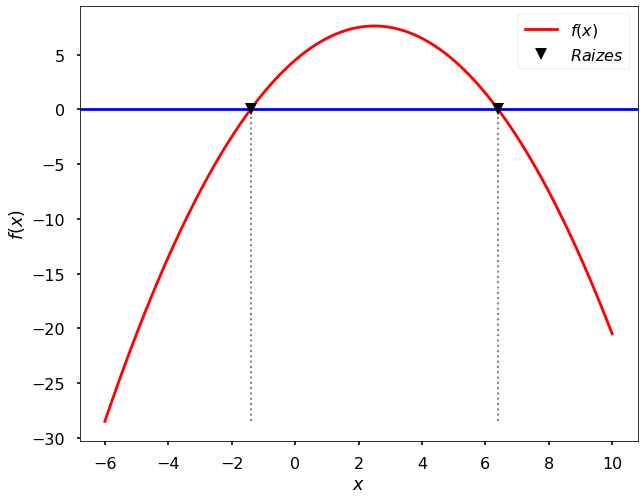

In [13]:
x = np.linspace(-6, 10, 500)

y = f(x)

raiz1 = optimize.root(f, -2)
raiz2 = optimize.root(f, 7)
raizes = np.array([raiz1.x, raiz2.x])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.vlines(x=raiz1.x, ymin=f(-6), ymax=0, colors='gray', ls=':', lw=2)
plt.vlines(x=raiz2.x, ymin=f(-6), ymax=0, colors='gray', ls=':', lw=2)

ax.axhline(0, color='b')

ax.plot(x, f(x), 'r', label="$f(x)$")
ax.plot(raizes, f(raizes), 'kv', label="$Raizes$")

ax.legend(loc='best')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.show()

<ul class="alert alert-block alert-info" style="color:#20484d;">
    <b>(b)</b> Usando a fórmula quadrática
</ul>

**Forma 1: "na raça" com Bhaskara**

In [14]:
def formula_quadratica(coefs, verbose=False):
    
    a = coefs[0]
    b = coefs[1]
    c = coefs[2]
    
    if a == 0:
        return
  
    bhask = (b**2) - 4*a*c 
    delta = np.sqrt(np.abs(bhask)) 
    
    if bhask > 0: 
        if verbose: print(" raizes reais e diferentes ")
        x1 = (-b + delta) / (2 * a)
        x2 = (-b - delta) / (2 * a)
        return x1, x2
      
    elif bhask == 0: 
        if verbose: print(" raizes reais e iguais ") 
        x = ( -b / (2 * a) )
        return x
      
    else:
        if verbose: print(" raizes complexas "); print(-b / (2 * a), " + i", delta); print(-b / (2 * a), " - i", delta);
        x = -b / (2 * a)
        return x
    
    return

In [15]:
formula_quadratica(coefs, True)

 raizes reais e diferentes 


**Forma 2: Usando Numpy**

In [16]:
coefs = np.array([a, b, c])
x1, x2 = np.roots(coefs)
x2, x1

**Forma 3: Usando SymPy (apenas simbólico)**

In [17]:
sp.var('x')
sp.solve(((-0.5)*(x**2)) + (2.5*x) + (4.5), x)

<ul class="alert alert-block alert-info" style="color:#20484d;">
    <b>(c)</b> Usando três iterações do método da bisseção para determinar a maior raiz. Use as aproximações iniciais $x_l = 5$ e $x_u = 10$. Calcule o erro relativo obtido entre cada iteração, e o erro entre os valores verdadeiros encontrados no item b e o valor de cada iteração.
</ul>

In [18]:
bissecao(f, 5, 10, 3, verbose=True, p_err=True)

Erro 1: 0.33333
Erro 2: 0.20000
Erro 3: 0.09091
---------------------------------------
      a     b      x      f(x)
0  5.00  10.0  7.500 -4.875000
1  5.00   7.5  6.250  0.593750
2  6.25   7.5  6.875 -1.945312
---------------------------------------
Raiz encontrada: 6.875 | Em 3 iterações
---------------------------------------


---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 3:</b> Localize a primeira raiz não-trivial de $sin \ x = x^3$, onde x está em radianos. Use uma técnica gráfica e a bisseção com o intervalo inicial de 0,5 a 1. Faça os cálculos até que o erro seja inferior a 2%.
</div>

In [19]:
f = lambda x: np.sin(x) - x**3

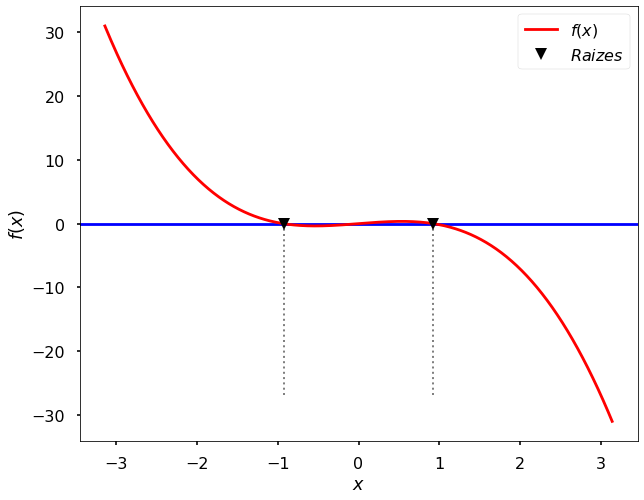

In [20]:
# gráfico
x = np.linspace(-np.pi, np.pi, 500)
y = f(x)

raiz1 = optimize.root(f, -2)
raiz2 = optimize.root(f, 7)
raizes = np.array([raiz1.x, raiz2.x])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.axhline(0, color='b')

plt.vlines(x=raiz1.x, ymin=f(3), ymax=0, colors='gray', ls=':', lw=2)
plt.vlines(x=raiz2.x, ymin=f(3), ymax=0, colors='gray', ls=':', lw=2)

ax.plot(x, f(x), 'r', label="$f(x)$")
ax.plot(raizes, f(raizes), 'kv', label="$Raizes$")

ax.legend(loc='best')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')

plt.show()

In [21]:
# bisseção
bissecao(f, 0.5, 1, tol=0.02, verbose=True)

------------------------------------------
         a       b         x      f(x)
0  0.50000  1.0000  0.750000  0.259764
1  0.75000  1.0000  0.875000  0.097622
2  0.87500  1.0000  0.937500 -0.017894
3  0.87500  0.9375  0.906250  0.042903
4  0.90625  0.9375  0.921875  0.013277
------------------------------------------
Raiz encontrada: 0.921875 | Em 5 iterações
------------------------------------------


---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 4:</b> Dada $f(x) = −2x^6 − 1.5x^4 + 10x + 20$, encontre o máximo dessa função ($f'(x) = 0$) usando o método da bisseção, considerando o intervalo $[0, 1]$ e um erro limite de 5%.
</div>

In [22]:
f = lambda x: ( (-2*x**6) - (1.5*x**4) + (10*x) + 20 )
sp.var('x')
f_sp = sp.Lambda(x, (-2*x**6) - (1.5*x**4) + (10*x) + 20)
f_sp

In [23]:
# derivada
sp.diff(f_sp(x), x)

In [24]:
f_ = lambda x: ( (-12*x**5) - (6*x**3) + 10 )

In [25]:
x, i = bissecao(f_, 0, 1, tol=0.05)

f'O máximo é {x} encontrado em {i} iterações'

'O máximo é 0.84375 encontrado em 5 iterações'

---

<div class="alert alert-block alert-info" style="color:#20484d;">
    <b>Exercicio 5</b>
</div>

In [26]:
def regula_falsi(f, xl, xu, tol=1e-10):
    
    if (f(xl) * f(xu) >= 0):
        return -1
    
    i = 0
    x = xl
    erro, x_ant = 1, x
    
    while erro > tol:
        
        x = xu - ( ( f(xu)*(xl-xu) ) / (f(xl)-f(xu)) )
            
        if f(x) * f(xl) < 0:
            xu = x
        
        else:
            xl = x
            
        erro = np.abs((x - x_ant) / np.abs(x))
        x_ant = x
        i += 1
    
    return ( x, i )

In [27]:
f = lambda x: ( x**5+2*x**3-5*x-2 )

In [28]:
# Comparativo de métodos
print(f'Método da Bisseção: \t {bissecao(f, -2, 2)}')
print(f'Método Regula Falsi: \t {regula_falsi(f, -2, 2)}')

Método da Bisseção: 	 (1.319641167181544, 35)
Método Regula Falsi: 	 (1.3196411670137347, 51)


Como podemos notar, o método **Regula Falsi** conseguiu ainda mais casas decimais, utilizando mais iterações e chegando a um valor ainda mais preciso que o método da **Bisseção**.